   Year  Month   Day Total_returns_received    Processed Total_e_file  \
0  2024    4.0  26.0            141,363,000  138,356,000  135,724,000   
1  2024    4.0  19.0            139,137,000  136,069,000  134,531,000   
2  2024    4.0  12.0            119,592,000  118,114,000  115,734,000   
3  2024    4.0   5.0            101,849,000  100,110,000   98,421,000   
4  2024    3.0  29.0             90,315,000   88,800,000   87,369,000   

      Tax_Pro Self_prepared Visits_to_IRS_gov Number_of_Refunds  \
0  72,201,000    63,523,000       591,742,000        91,359,000   
1  71,327,000    63,204,000       571,496,000        86,058,000   
2  63,318,000    52,416,000       533,981,000        74,685,000   
3  53,157,000    45,264,000       497,397,000        66,799,000   
4  46,302,000    41,068,000       467,978,000        60,858,000   

  Amount_of_Refunds_in_billions Average_Refund  \
0                       $260.56         $2,852   
1                       $245.23         $2,850   
2       

<ipython-input-36-dbd4b549d29b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Total_returns_received'] = df_2023['Total_returns_received'].str.replace(',', '').astype(float)
<ipython-input-36-dbd4b549d29b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Processed'] = df_2023['Processed'].str.replace(',', '').astype(float)
<ipython-input-36-dbd4b549d29b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

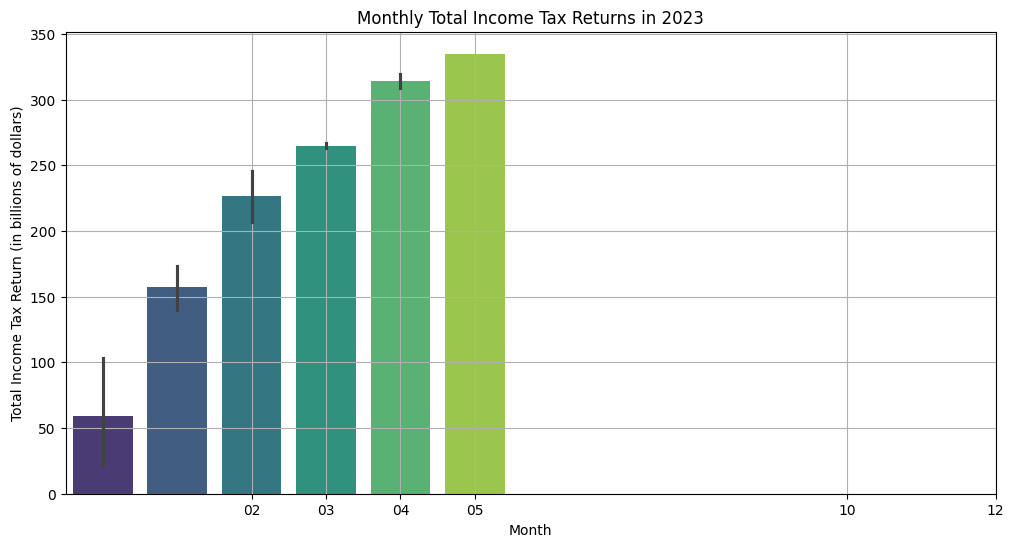

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and skip the first two rows
df = pd.read_csv('/content/incometax.csv', skiprows=2)

# Rename columns for clarity
df.columns = [
    "Year", "Month", "Day",
    "Total_returns_received", "Processed",
    "Total_e_file", "Tax_Pro", "Self_prepared",
    "Visits_to_IRS_gov",
    "Number_of_Refunds", "Amount_of_Refunds_in_billions", "Average_Refund",
    "Number_of_Direct_Deposit_Refunds", "Amount_of_Direct_Deposit_Refunds_in_billions", "Average_Direct_Deposit_Refund"
]

# Display the first few rows of the renamed columns
print(df.head())

# Filter the data for the year 2023
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert 'Year' column to numeric
df_2023 = df[df['Year'] == 2023]  # Filter the DataFrame for the year 2023

# Convert relevant columns to numeric, removing commas
df_2023['Total_returns_received'] = df_2023['Total_returns_received'].str.replace(',', '').astype(float)
df_2023['Processed'] = df_2023['Processed'].str.replace(',', '').astype(float)
df_2023['Total_e_file'] = df_2023['Total_e_file'].str.replace(',', '').astype(float)
df_2023['Amount_of_Refunds_in_billions'] = df_2023['Amount_of_Refunds_in_billions'].str.replace('$', '').str.replace(',', '').astype(float)

# Example Analysis: Total Returns Received in 2023
total_returns_2023 = df_2023['Total_returns_received'].sum()
print(f"Total Returns Received in 2023: {total_returns_2023}")

# Example Analysis: Processed Returns in 2023
processed_returns_2023 = df_2023['Processed'].sum()
print(f"Processed Returns in 2023: {processed_returns_2023}")

# Example Analysis: E-filed Returns in 2023
total_e_file_2023 = df_2023['Total_e_file'].sum()
print(f"Total E-filed Returns in 2023: {total_e_file_2023}")

# Calculate the total income tax return
total_income_tax_return_2023 = df_2023['Amount_of_Refunds_in_billions'].sum()
print(f"Total Income Tax Return in 2023: ${total_income_tax_return_2023} billion")

# Visualization: Bar chart for monthly Amount_of_Refunds_in_billions in 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=df_2023['Month'], y=df_2023['Amount_of_Refunds_in_billions'], palette='viridis')

plt.title('Monthly Total Income Tax Returns in 2023')
plt.xlabel('Month')
plt.ylabel('Total Income Tax Return (in billions of dollars)')
plt.grid(True)

# Ensure all months are shown and sorted
plt.xticks(ticks=sorted(df_2023['Month'].unique()), labels=[f'{int(m):02d}' for m in sorted(df_2023['Month'].unique())])
plt.show()
